# Introduction
Through this project, we came up with a way of how to strategically identify the best neighborhood in Pittsburgh. Being that there are multiple ways to interpret what's considered the "best", we interpreted this in terms of safety (crims, disasters) and stability (income). This is because for a neighborhood to be considered a quality place to live, it must be safe and stable. (finish intro)

# The Metric
We are measuring the total number of `arrests`, `fire incidents`, and the `average income` for each neighborhood in Pittsburgh given the following datasets:
* police_arrest.csv
    * https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f 
* Fire Incidencts.csv
    * https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02 
* income.csv
    * https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/14abb000-d066-4728-8ffa-227883d6c331/download/wage-or-salary-income-in-the-past-12-months-for-households.csv

Based on all of these datasets, we gather information specifically regarding the neighborhoods given the metrics we chose.

## The Data: Arrests

In [694]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [696]:
# Import data
arrests = pd.read_csv('police_arrest.csv', index_col='_id')
arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
1,1975272,16158872,42.00,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.00,8.00,2.00,-79.95,40.45
2,1974456,16144120,31.00,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.00,NaN,NaN,-80.09,40.44
3,1974466,16144165,63.00,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.00,9.00,2.00,-79.89,40.49
4,1974550,16145257,25.00,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.00,1.00,1.00,-80.00,40.45
5,1974596,16145962,25.00,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.00,2.00,5.00,-80.05,40.45


### Parse and Organize Data

In [699]:
arrests = arrests.rename(columns={
    'INCIDENTNEIGHBORHOOD': 'Neighborhood'
})
arrests = arrests[arrests['Neighborhood'] != 'Outside City']
arrests = arrests.groupby('Neighborhood').size().reset_index(name='Arrests')
arrests = arrests.sort_values(by='Arrests', ascending=True)
arrests

,Neighborhood,Arrests
57,Mt. Oliver Neighborhood,2
90,Troy Hill-Herrs Island,6
56,Mt. Oliver Boro,18
19,Central Northside,23
72,Ridgemont,37
...,...,...
43,Homewood South,2090
26,East Allegheny,2217
15,Carrick,2352
77,South Side Flats,3497


In [701]:
# Creates another dataframe for graphing
arrests_res = pd.DataFrame({
    'Neighborhood': arrests['Neighborhood'],
    'Arrests': arrests['Arrests']
})
# Set the neighborhood column as index
arrests_res = arrests_res.set_index('Neighborhood')
arrests_res

,Arrests
Neighborhood,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Ridgemont,37
...,...
Homewood South,2090
East Allegheny,2217
Carrick,2352


### Plot Data

Text(0.5, 1.0, 'Police Arrest Records by Neighborhood')

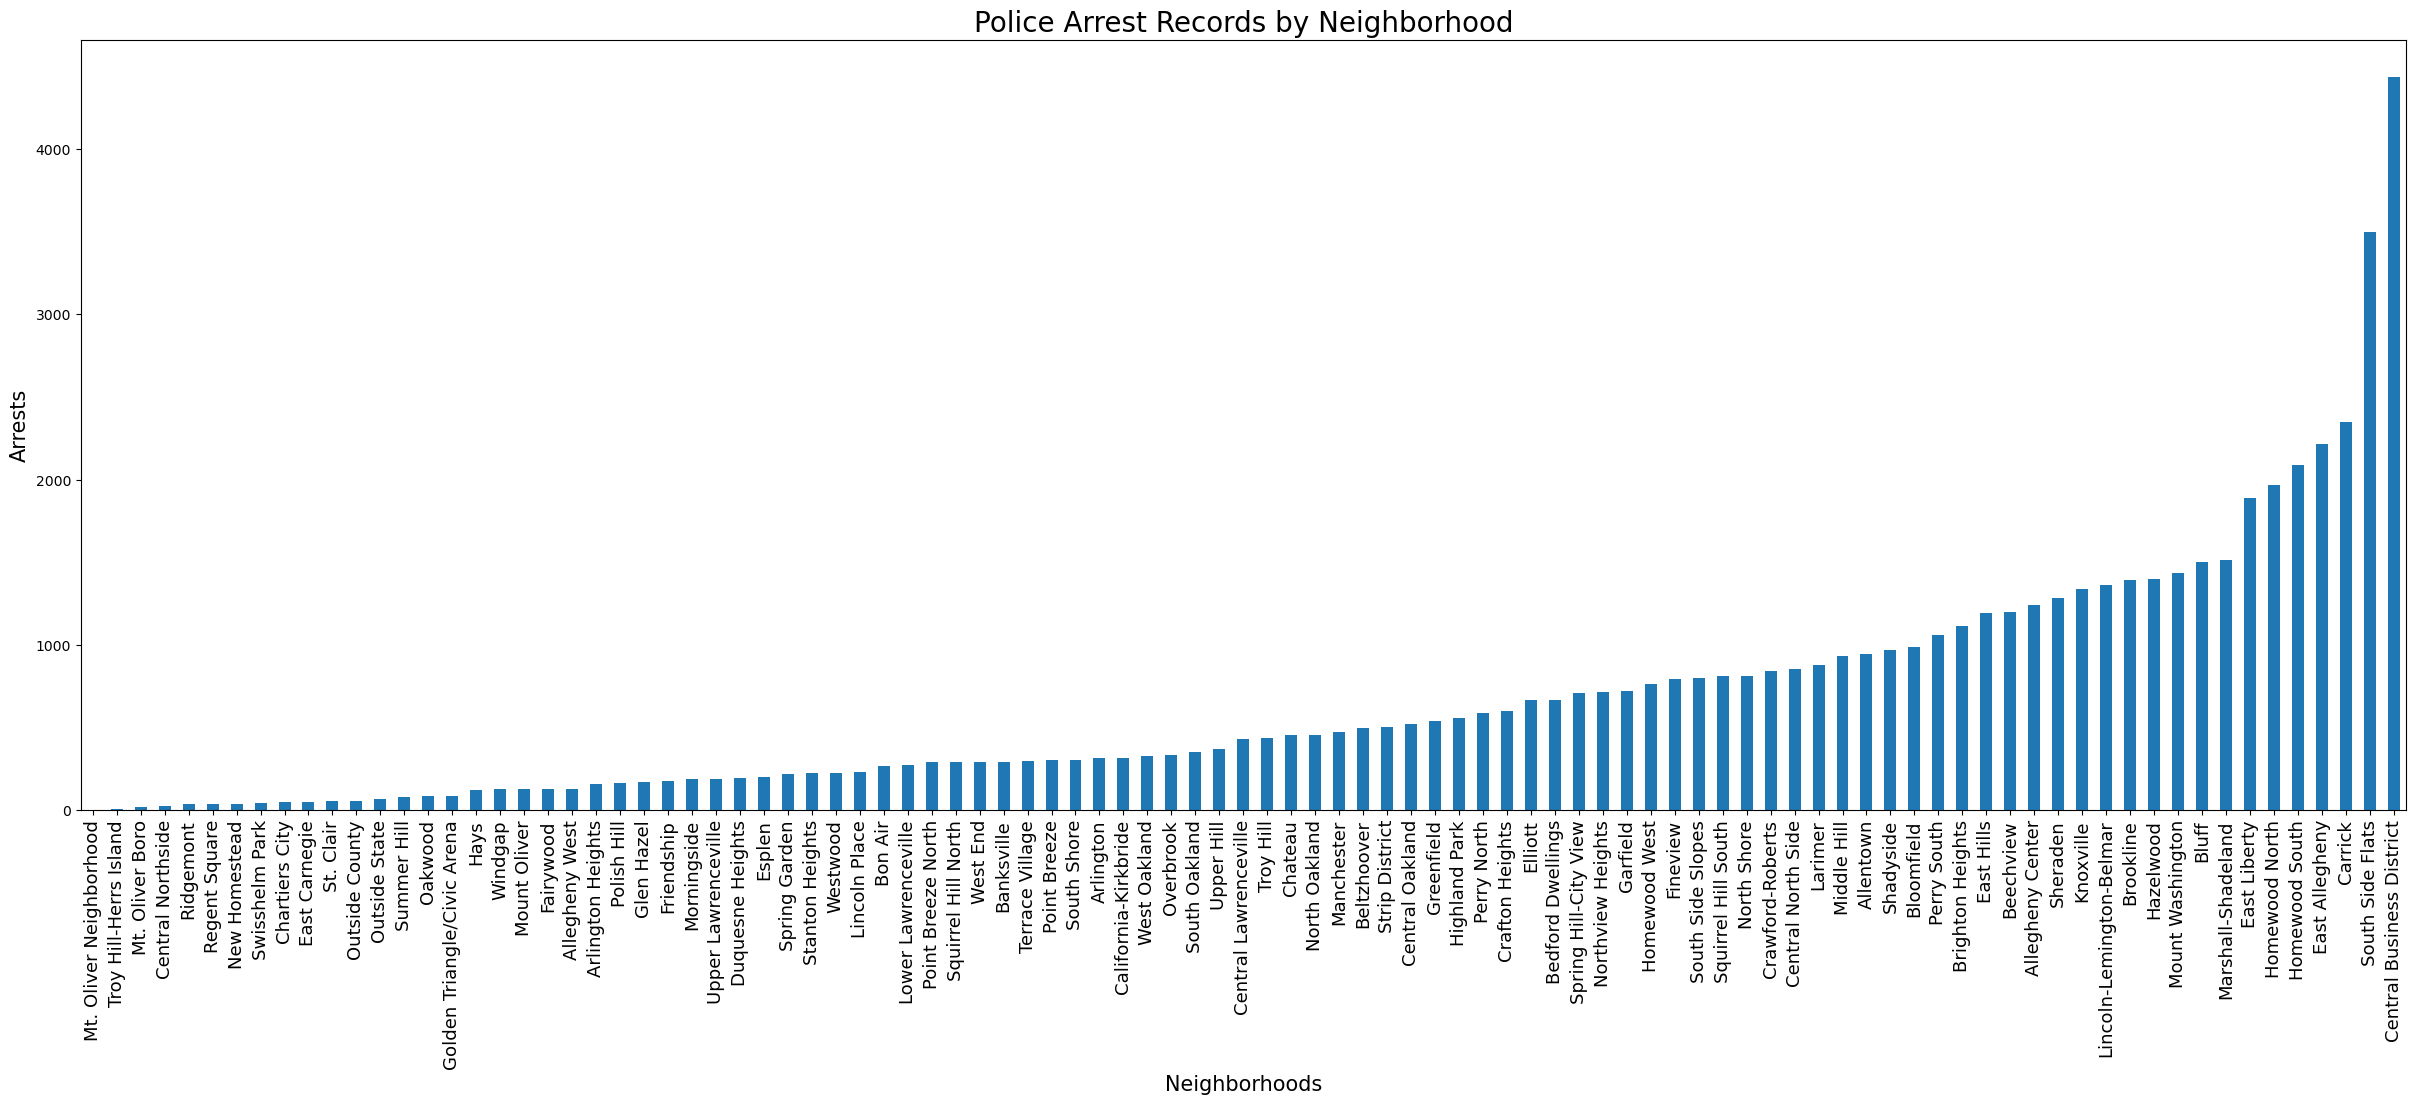

In [704]:
arrests_res['Arrests'].plot.bar(figsize=(30, 10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Arrests', fontsize=15)
plt.title('Police Arrest Records by Neighborhood', fontsize=20)

## The Data: Fire Incidents

In [707]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [709]:
# Import data
file_path = 'Fire Incidents.csv'
fire = pd.read_csv(file_path)
fire.head() 

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.00,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,42003560600.00,NaN,NaN,NaN,3-16,40.44,-79.88
1,2,F180022058,111.00,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,42003561000.00,NaN,NaN,NaN,3-21,40.44,-79.88
2,3,F180022102,131.00,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.00,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.00,Fineview,6.00,25.00,42003250900.00,1.00,25.00,1.00,1-10,40.46,-80.01
4,5,F180021111,111.00,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.00,Fairywood,2.00,28.00,42003563000.00,5.00,28.00,6.00,1-16,40.45,-80.08


### Parse and Organize Data

In [712]:
fire = fire.rename(columns={'neighborhood': 'Neighborhood'})
fire = fire.groupby("Neighborhood").size().reset_index(name="Fire Incidents") # Group by neighborhood
fire = fire.sort_values(by="Fire Incidents", ascending=True) # Sort neighborhoods in lowest fire incidents to highest
fire 

,Neighborhood,Fire Incidents
52,Mount Oliver Borough,6
66,Regent Square,9
26,East Carnegie,11
67,Ridgemont,12
54,Mt. Oliver,12
...,...,...
38,Hazelwood,257
77,Squirrel Hill South,267
72,South Side Flats,288
16,Central Business District,289


In [714]:
# Creates another dataframe for graphing
fire_res = pd.DataFrame({
    'Neighborhood': fire['Neighborhood'],
    'Fire Incidents': fire['Fire Incidents']
})
fire_res = fire_res.set_index('Neighborhood')
fire_res

,Fire Incidents
Neighborhood,
Mount Oliver Borough,6
Regent Square,9
East Carnegie,11
Ridgemont,12
Mt. Oliver,12
...,...
Hazelwood,257
Squirrel Hill South,267
South Side Flats,288


### Plot Data

Text(0.5, 1.0, 'Fire Incidents by Neighborhood')

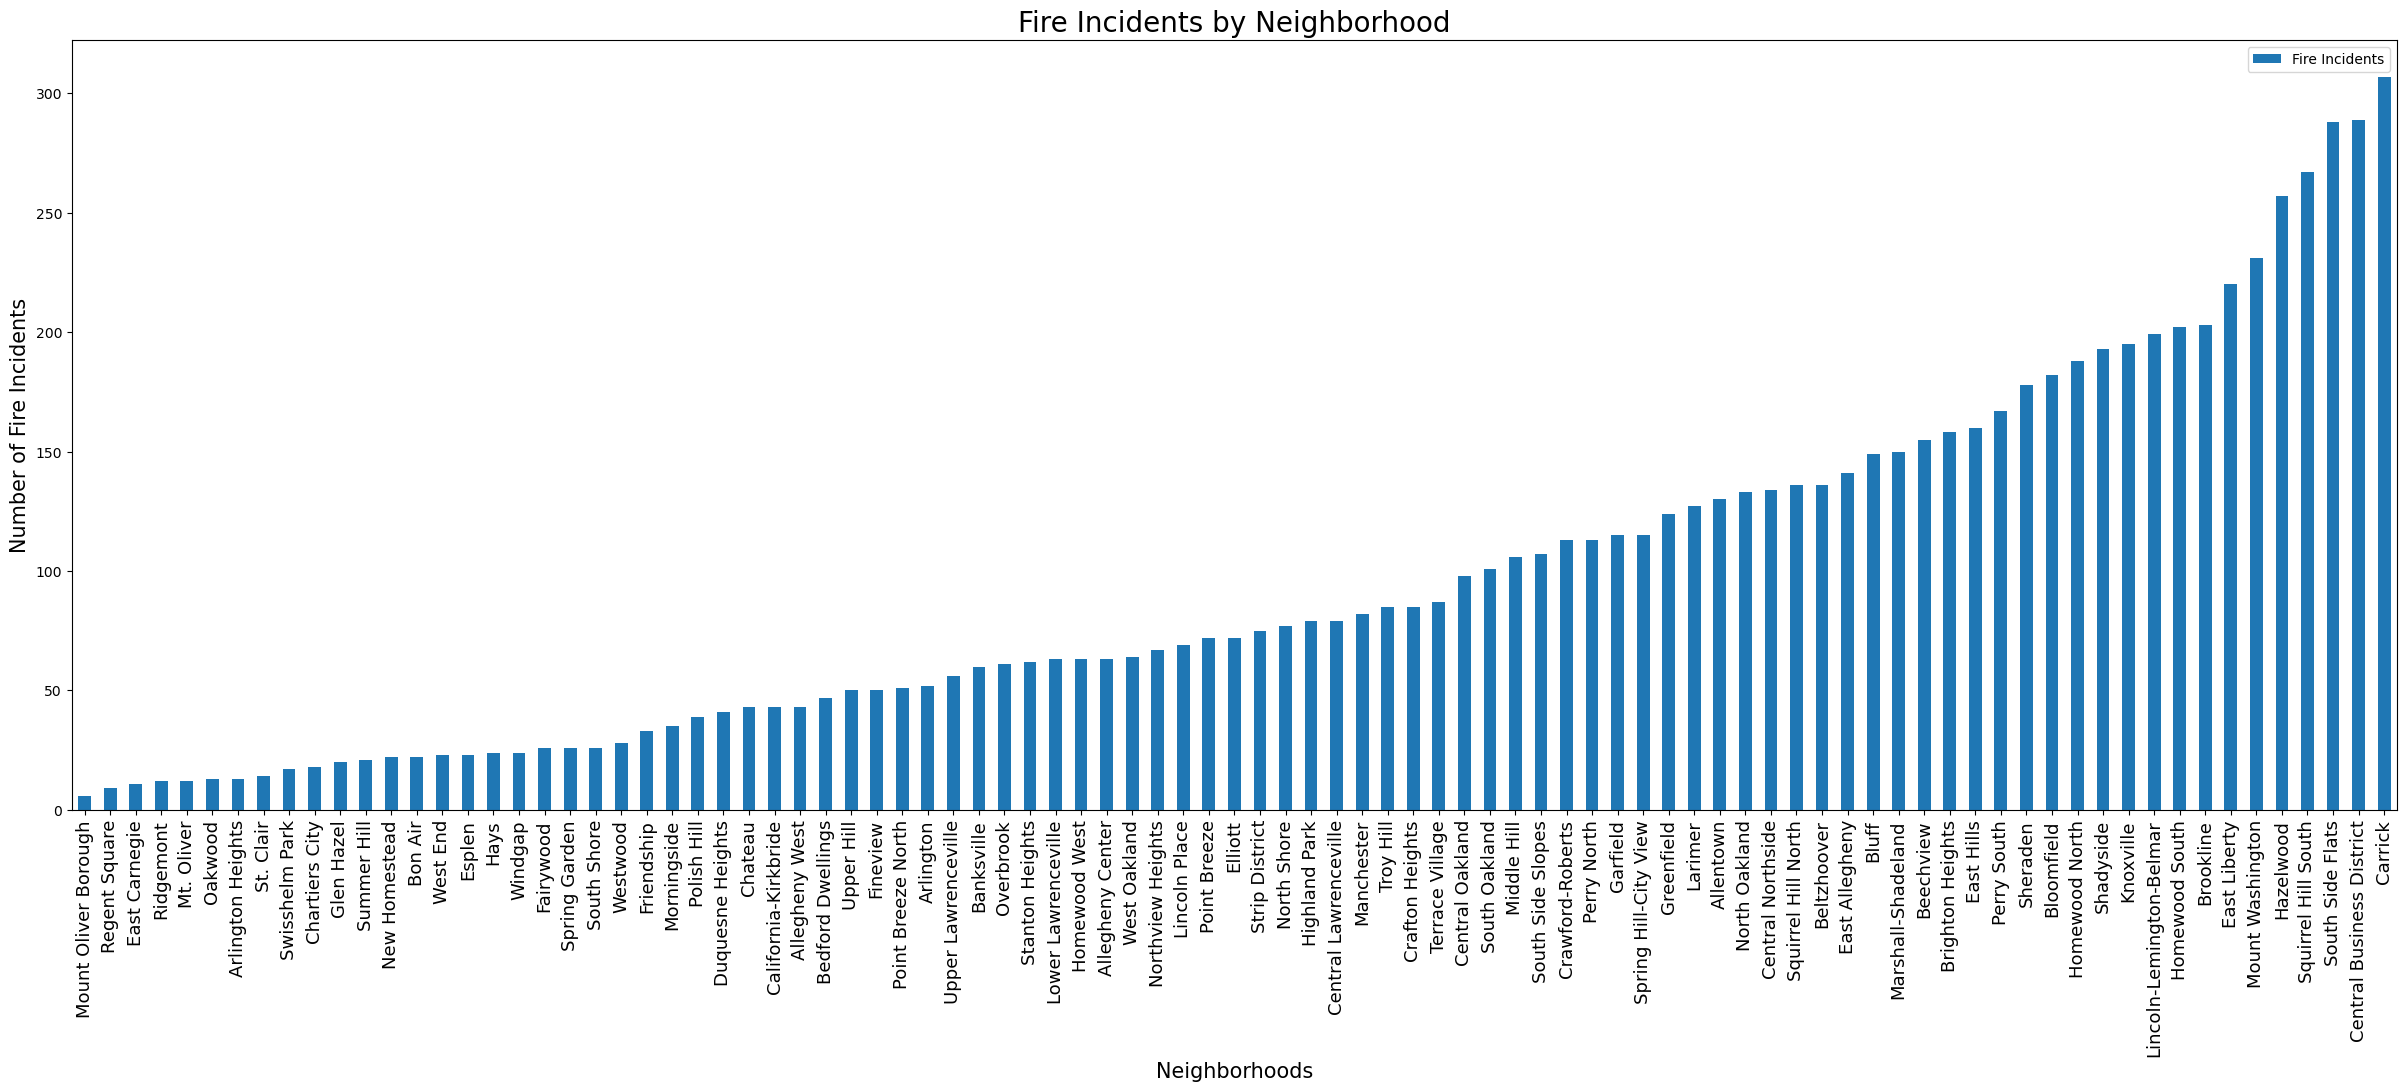

In [717]:
fire_res.plot.bar(figsize=(30,10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Number of Fire Incidents', fontsize=15)
plt.title('Fire Incidents by Neighborhood', fontsize=20)

## The Data: Income

In [763]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensures that all float numbers are displayed with two decimal places
pd.options.display.float_format = '{:.2f}'.format

# Import data
income = pd.read_csv('income.csv')
income

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,1,Allegheny Center,1,733.00,103.00,462.00,94.00,271.00,87.00
1,2,Allegheny West,2,150.00,46.00,120.00,40.00,30.00,26.00
2,3,Allentown,3,1138.00,152.75,772.00,146.77,366.00,109.39
3,4,Arlington,4,685.00,105.37,566.00,104.59,119.00,44.45
4,5,Arlington Heights,5,170.00,69.00,96.00,58.00,74.00,52.00
...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,1262.00,144.10,937.00,138.11,325.00,110.06
87,88,West End,88,120.00,59.00,99.00,57.00,21.00,19.00
88,89,West Oakland,89,592.00,89.11,371.00,91.55,221.00,65.80
89,90,Westwood,90,1514.00,118.83,1255.00,130.87,259.00,79.20


### Parse and Organize Data for Total Income

In [766]:
income = income.rename(columns={
    'Estimate; Total:': 'Income',
    'Margin of Error; Total:': 'Margin of Error'
})
income = income[['Neighborhood', 'Income', 'Margin of Error']]
income = income[income['Income'] > 10]
income = income.sort_values(by='Income', ascending=False)
income

,Neighborhood,Income,Margin of Error
68,Shadyside,7462.00,368.26
77,Squirrel Hill South,6918.00,334.92
13,Brookline,6017.00,340.49
9,Bloomfield,4640.00,215.51
53,Mount Washington,4425.00,254.96
...,...,...,...
1,Allegheny West,150.00,46.00
30,Esplen,147.00,53.00
57,North Shore,141.00,36.40
87,West End,120.00,59.00


In [771]:
# Creates another dataframe for graphing
income_res = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Income': income['Income'],
    'Margin of Error': income['Margin of Error']
})
income_res = income_res.set_index('Neighborhood')
income_res

,Income,Margin of Error
Neighborhood,,
Shadyside,7462.00,368.26
Squirrel Hill South,6918.00,334.92
Brookline,6017.00,340.49
Bloomfield,4640.00,215.51
Mount Washington,4425.00,254.96
...,...,...
Allegheny West,150.00,46.00
Esplen,147.00,53.00
North Shore,141.00,36.40


### Plot Data

Text(0.5, 1.0, 'Estimated Income by Neighborhoods')

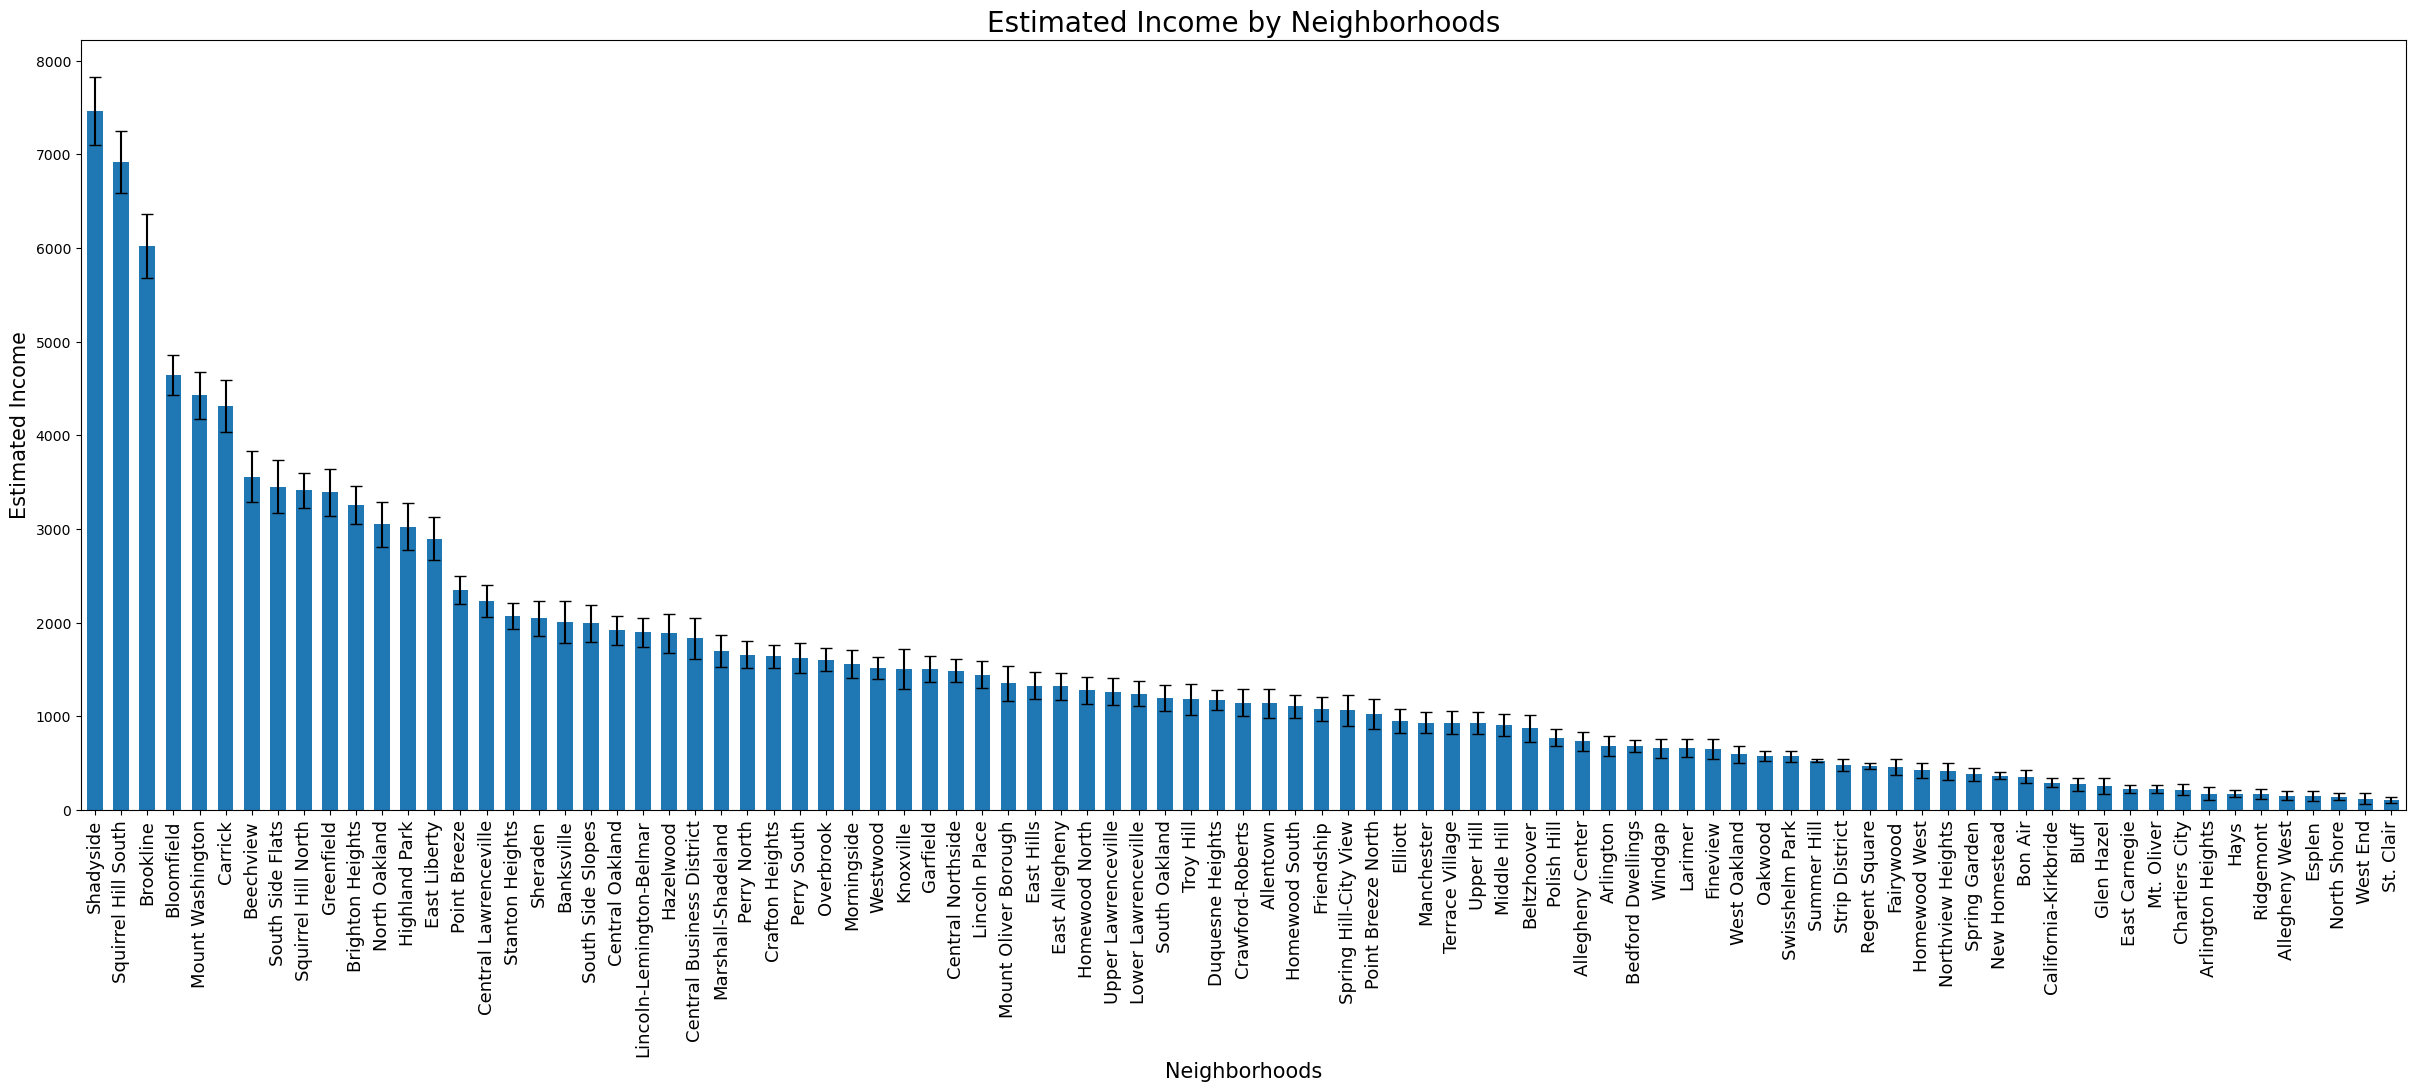

In [774]:
income_res['Income'].plot.bar(figsize=(30, 10), width=0.6, yerr=income_res['Margin of Error'], capsize=4)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Estimated Income', fontsize=15)
plt.title('Estimated Income by Neighborhoods', fontsize=20)

## Combining Data
Combine three datasets into one graph to evaluate which neighborhood is the best in Pittsburgh on a standard metrics

### Merge Data
Using `merge` to merge all three datasets with inner join operation. By including the parameter `how='inner'`, it ensures that only neighborhoods present in both DataFrames being merged are kept

In [776]:
merged = income_res.merge(fire, on='Neighborhood', how='inner')
merged = merged.merge(arrests, on='Neighborhood', how='inner')
merged

,Neighborhood,Income,Margin of Error,Fire Incidents,Arrests
0,Shadyside,7462.00,368.26,193,971
1,Squirrel Hill South,6918.00,334.92,267,812
2,Brookline,6017.00,340.49,203,1390
3,Bloomfield,4640.00,215.51,182,984
4,Mount Washington,4425.00,254.96,231,1434
...,...,...,...,...,...
82,Allegheny West,150.00,46.00,43,130
83,Esplen,147.00,53.00,23,200
84,North Shore,141.00,36.40,77,814
85,West End,120.00,59.00,23,290


### Normalize Data
Normalization ensures that all metrics contribute equally to the evaluation.
$$
\text{Normalized Value} = \frac{\text{Value} - \text{Min}}{\text{Max} - \text{Min}}
$$

In [794]:
normalized_income = (merged['Income'] - merged['Income'].min()) / (merged['Income'].max() - merged['Income'].min())

# Using inverse normalization because fewer fire incidents and arrests are better
normalized_fire = 1 - ((merged['Fire Incidents'] - merged['Fire Incidents'].min()) / (merged['Fire Incidents'].max() - merged['Fire Incidents'].min()))
normalized_arrests = 1 - ((merged['Arrests'] - merged['Arrests'].min()) / (merged['Arrests'].max() - merged['Arrests'].min()))

### Compute the Combined Score
We assign weights to each metric to conclude a score for each neighborhood, where $( w_1, w_2, w_3 )$ are the weights assigned to each metric.   
`Average Income:` 34%   
`Fire Incidents:` 33%   
`Arrests:` 33%
$$
\text{Combined Score} = w_1 \cdot \text{Normalized Income} + w_2 \cdot \text{Normalized Fire Incidents} + w_3 \cdot \text{Normalized Arrests}
$$

In [799]:
combined_res = 0.34 * normalized_income + 0.33 * normalized_fire + 0.33 * normalized_arrests
final = pd.DataFrame({
    'Neighborhood': merged['Neighborhood'],
    'Combined Score': combined_res
})
final = final.set_index('Neighborhood')
final = final.sort_values(by='Combined Score', ascending=False)
final

,Combined Score
Neighborhood,
Shadyside,0.73
Westwood,0.69
Morningside,0.69
Highland Park,0.68
Stanton Heights,0.68
...,...
Hazelwood,0.37
Carrick,0.35
Homewood South,0.34


### Plot Data

Text(0.5, 1.0, 'Overall Neighborhood Scores in Pittsburgh')

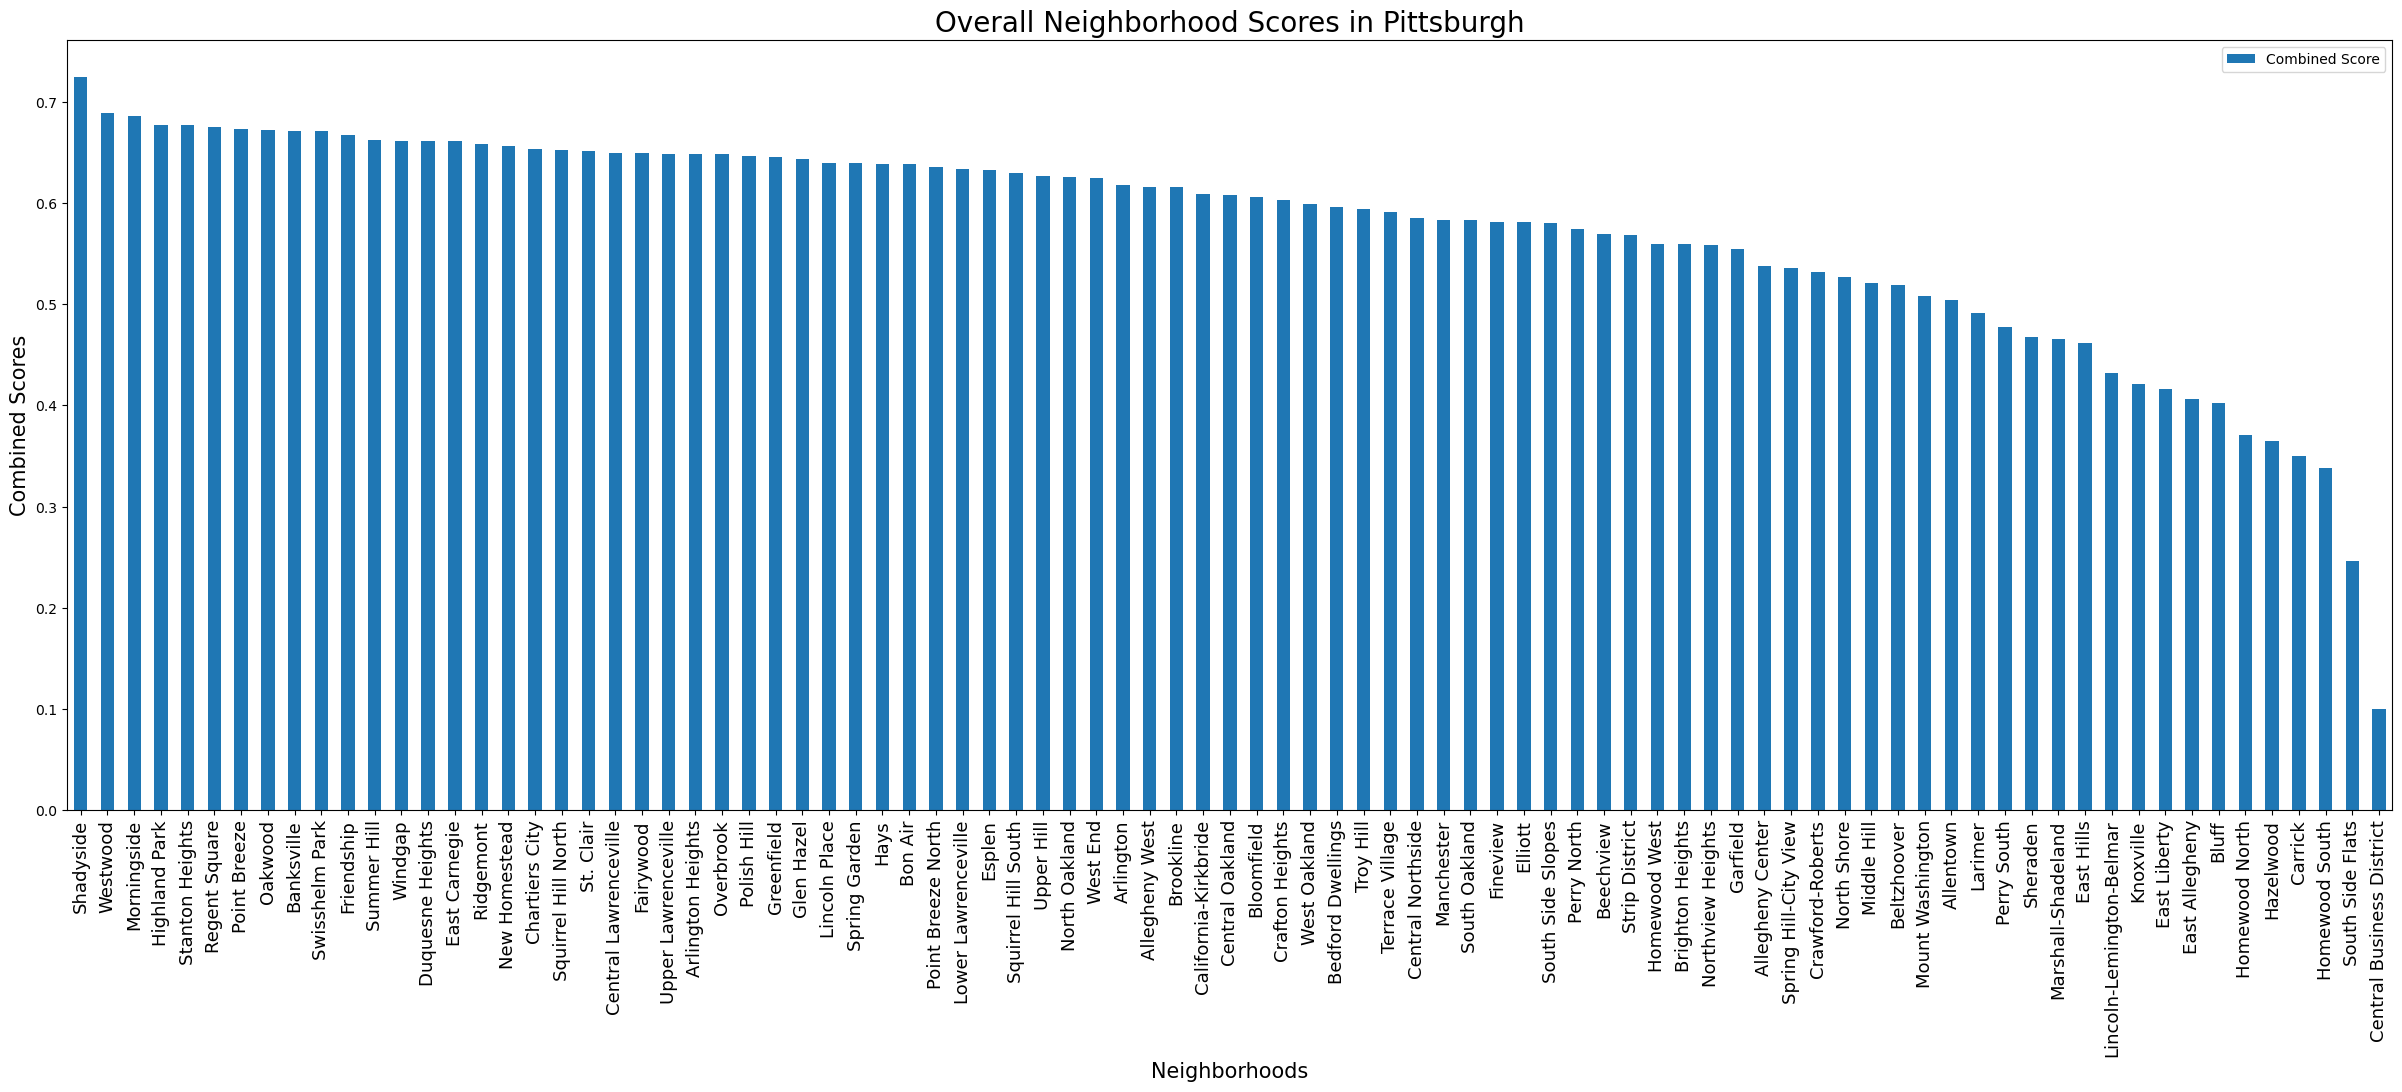

In [801]:
final.plot.bar(figsize=(30, 10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Combined Scores', fontsize=15)
plt.title('Overall Neighborhood Scores in Pittsburgh', fontsize=20)

# The Best Neighborhood
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data-driven argument.

# Conclusion

#### Stanley: 
"I've lived in Shadyside for almost three years now and it's no surprised to me that Shadyside being the best neighborhood from our data-driven determination. My personal experience of living there aligns with the data, highlighting its strengths in areas such as income levels, safety, and overall livability."